# The Climate impacts of Rice Cultivation.

## Intro

According to the United Nations Environment Program "methane is the primary contributor to the formation of ground-level ozone." Over 20 years, "it is 80 times more potent at warming than carbon dioxide." a hazardous air pollutant and greenhouse gas, exposure to which causes 1 million premature deaths every year. Methane is also a powerful greenhouse gas. Over a 20-year period, it is 80 times more potent at warming than carbon dioxide [(UNEP)](https://www.unep.org/news-and-stories/story/methane-emissions-are-driving-climate-change-heres-how-reduce-them).  In fact, one kilogram of CH4 produced is equivalent to 25 kilograms of CO2.[(Econometra)[https://ecometrica.com/assets/GHGs-CO2-CO2e-and-Carbon-What-Do-These-Mean-v2.1.pdf].  

The agricultural industry is the primary producer of methane emissions globally.  While the cattle industry is a well known culprit, paddy rice cultivation – in which flooded fields prevent oxygen from penetrating the soil, creating ideal conditions for methane-emitting bacteria – accounts for another 8 per cent of human-linked emissions.[source](https://www.unep.org/news-and-stories/story/methane-emissions-are-driving-climate-change-heres-how-reduce-them).  This equates to an average insert equivalency here to rice cultivation.  


## Measuring Paddy Rice CH4 Emissions

FAOStat (insert source here ) is the leading provider of ch4 emissions released by industrial agrictulture.  They estimate emissions by multiplying reported hectares of cultivated land by a conversion factor of (insert here).  

TRACE on the other hand estimates emissions levels by calculating the area of cultivated paddies with Satalite imaging at 500 meters and multiplying that number by a different conversion factor.   On average this results in 26,963 tonnes or 67,4075 Tonnes CO2eq of undercounted CH4 emissions annually according to TRACE.  

It is important to note that both organizations rely on data that may not account for every parcel of land in cultivation.  FAOSTAT relies on government reported values that may be manipulated to increase assistance from Non governmental organizations and foreign governments.  TRACE data may not accurately capture small fields or paddies at high elevation due to limitted specificity(not the word i want but it will come back to me) of satellite images.  


## The Data

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import contextily as cx
from shapely.geometry import Point, LineString, Polygon
import numpy as np
from scipy.spatial import cKDTree
from geopy.distance import distance
import scipy.stats as stats
from mpl_toolkits.axes_grid1 import make_axes_locatable


### Set Default Fig Size 

In [65]:
plt.rcParams['figure.figsize'] = [10, 10]

### FAO STAT Data

In [27]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/FAOSTAT_DATA.csv"

faostat_emissions_df = pd.read_csv(filepath)
faostat_emissions_df.drop('Unnamed: 0', axis = 1 , inplace = True)

### FAOSTAT Table

In [28]:
## I didn't write the index to the csv file in the previous step.  IF time permits go back and fix this error
faostat_emissions_df


,iso3_country,country_name,2015,2016,2017,2018,2019,2020,2021,Mean,Total
0,BGD,Bangladesh,1131293.4,1093480.4,1154531.0,1144591.0,1144745.4,NaN,NaN,1133728.24,5668641.2
1,BRA,Brazil,138910.3,126278.2,130322.9,121615.2,111084.8,NaN,NaN,125642.28,628211.4
2,CHN,China,5406593.9,5399920.0,5400129.0,5302173.1,5214454.7,NaN,NaN,5344654.14,26723270.7
3,ESP,Spain,55082.2,55073.1,54232.4,52925.0,52098.5,NaN,NaN,53882.24,269411.2
4,IDN,Indonesia,2407953.5,2387656.4,2425290.6,2405613.8,2257604.3,NaN,NaN,2376823.72,11884118.6
5,IND,India,4580248.4,4559136.4,4620790.8,4661154.9,4621416.8,NaN,NaN,4608549.46,23042747.3
6,IRN,Iran (Islamic Republic of),116486.7,131008.5,87233.6,93936.6,96103.4,NaN,NaN,104953.76,524768.8
7,ITA,Italy,114574.8,118003.0,118003.0,109463.8,110895.1,NaN,NaN,114187.94,570939.7
8,JPN,Japan,330353.1,326403.0,323700.3,322245.0,320581.8,NaN,NaN,324656.64,1623283.2
9,KHM,Cambodia,436826.0,459003.1,473745.3,479362.7,468378.9,NaN,NaN,463463.20,2317316.0


### FaoSTAT PLOTS

#### FAOSTAT Emissions Estimates Bar Plot

<AxesSubplot:title={'center':'FAOSTAT Tonnes CH4 Emissions'}, ylabel='Country Name'>

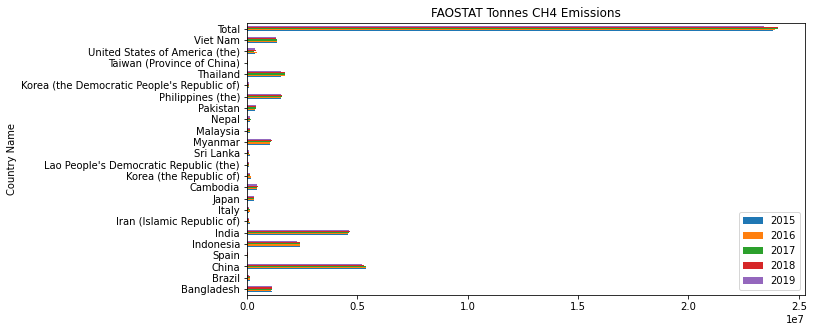

In [29]:
faostat_emissions_df.plot(kind = "barh", x = 'country_name', y = ["2015", "2016", "2017", "2018", "2019"], xlabel = "Country Name", ylabel = "Tonnes CH4", title = "FAOSTAT Tonnes CH4 Emissions", figsize = (10,5))

The annual production of methane does not vary greatly.  As emissions are dependent on hectares in production we can assume that hectares in production do not vary. 

### FAOSTAT Density Plot

<AxesSubplot:title={'center':'FAOSTAT Tonnes CH4 Emissions'}, ylabel='Density'>

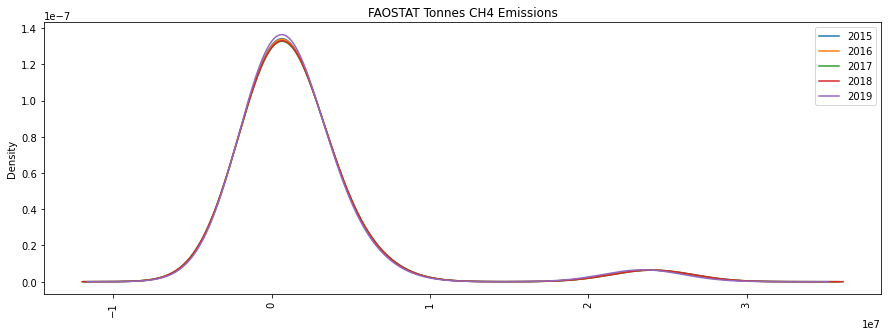

In [30]:
faostat_emissions_df.plot(rot = 90, kind = "density",y = ["2015", "2016", "2017", "2018", "2019"], title = "FAOSTAT Tonnes CH4 Emissions", figsize = (15,5)) 

The density plot demonstrates the distributions are nearly identical excluding 2019.  We actually see a minor drop in production levels.  The covid pandemic may have slightly reduced methane emissions. 

### TRACE DATA

We will not compare the trace data to the FAOSTAT Data.  We will see that the predictions to do not greatly differ

In [107]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/TRACE_DATA.csv"

trace_emissions_df = pd.read_csv(filepath)
trace_emissions_df.drop('Unnamed: 0', axis = 1 , inplace = True)

In [108]:
trace_emissions_df

,iso3_country,country_name,tCH4_2015,tCH4_2016,tCH4_2017,tCH4_2018,tCH4_2019,tCH4_2020,tCH4_2021,Mean,Total
0,BGD,Bangladesh,2.344420e+06,2.278158e+06,2.098958e+06,2.141231e+06,2.070985e+06,2.106781e+06,1.983974e+06,2.146358e+06,1.502451e+07
1,BRA,Brazil,3.410233e+05,3.104189e+05,3.725173e+05,3.717030e+05,3.294713e+05,4.902874e+05,4.544874e+05,3.814155e+05,2.669909e+06
2,CHN,China,6.133647e+06,5.859531e+06,6.355071e+06,5.413962e+06,5.603352e+06,6.402353e+06,6.068210e+06,5.976589e+06,4.183613e+07
3,ESP,Spain,1.141464e+04,1.334803e+04,1.217299e+04,1.405410e+04,1.148324e+04,1.305461e+04,8.531579e+03,1.200845e+04,8.405918e+04
4,IDN,Indonesia,1.283649e+06,1.023129e+06,9.615327e+05,1.176982e+06,1.266668e+06,1.188195e+06,1.009936e+06,1.130013e+06,7.910092e+06
5,IND,India,6.219887e+06,5.309413e+06,6.228451e+06,6.589798e+06,7.501556e+06,7.599764e+06,6.567960e+06,6.573832e+06,4.601683e+07
6,IRN,Iran (Islamic Republic of),8.774407e+04,9.180121e+04,9.620217e+04,8.875744e+04,9.500199e+04,9.600254e+04,9.053525e+04,9.229210e+04,6.460447e+05
7,ITA,Italy,4.995968e+04,4.937785e+04,5.443679e+04,4.469902e+04,4.566914e+04,5.101547e+04,5.089759e+04,4.943651e+04,3.460555e+05
8,JPN,Japan,2.305465e+05,2.284133e+05,2.708935e+05,1.548252e+05,2.332056e+05,2.835167e+05,1.574007e+05,2.226859e+05,1.558802e+06
9,KHM,Cambodia,4.954698e+05,5.731698e+05,4.517045e+05,5.592610e+05,5.947277e+05,6.412802e+05,5.644891e+05,5.543003e+05,3.880102e+06


### TRACE PLOTS

#### TRACE Emissions Estimates Bar Plot

<AxesSubplot:title={'center':'TRACE Tonnes CH4 Emissions'}, ylabel='Country Name'>

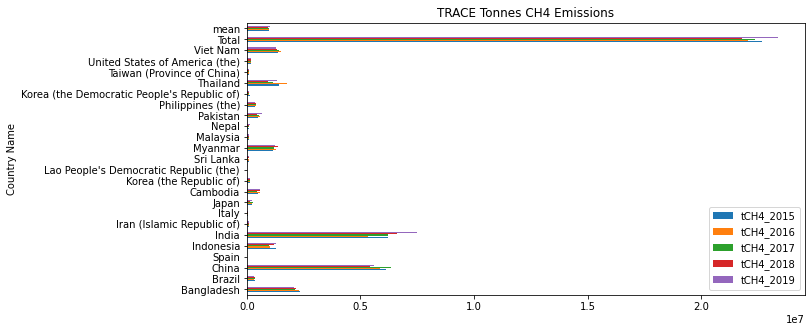

In [109]:
trace_emissions_df.plot(kind = "barh", x = 'country_name', y = ["tCH4_2015", "tCH4_2016", "tCH4_2017", "tCH4_2018", "tCH4_2019"], xlabel = "Country Name", ylabel = "Tonnes CH4", title = "TRACE Tonnes CH4 Emissions", figsize = (10,5))

The annual production of methane does not vary greatly.  As emissions are dependent on hectares in production we can assume that hectares in production do not vary. 

### FAOSTAT Density Plot

<AxesSubplot:title={'center':'TRACE Tonnes CH4 Emissions'}, ylabel='Density'>

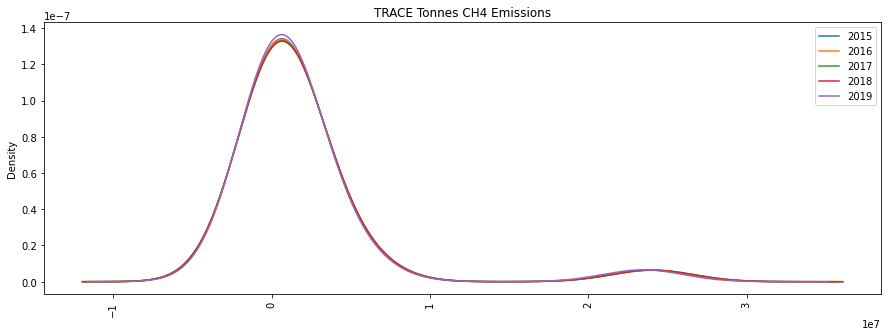

In [110]:
faostat_emissions_df.plot(rot = 90, kind = "density",y = ["2015", "2016", "2017", "2018", "2019"], title = "TRACE Tonnes CH4 Emissions", figsize = (15,5)) 

The density plot demonstrates the distributions are nearly identical excluding 2019.  We actually see a minor drop in production levels.  The covid pandemic may have slightly reduced methane emissions. 

## FaoStat Cloropleth Map

In [111]:
gisfilepath = "/Users/jnapolitano/Projects/wattime-takehome/data/FAOSTAT_GEO.geojson"


faostat_geo_df = gpd.read_file(gisfilepath)

faostat_geo_df = faostat_geo_df.to_crs(epsg=3857)

In [112]:
#faostat_geo_df.replace(np.nan,0,inplace=True)

### Average Annually FAOSTAT

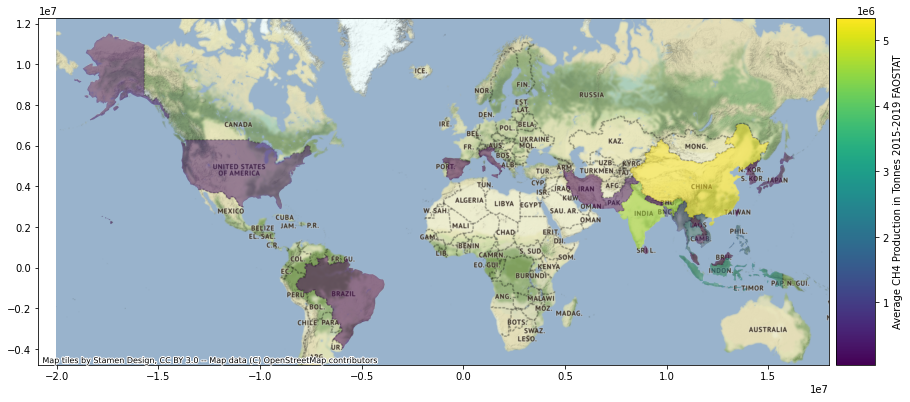

In [113]:
fig, ax = plt.subplots(1, 1,figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
faostat_map = faostat_geo_df.plot(column='Mean', ax=ax, legend=True, cax=cax, alpha = .5,legend_kwds={'label': "Average CH4 Production in Tonnes 2015-2019 FAOSTAT",
                        'orientation': "vertical"})
cx.add_basemap(faostat_map, zoom=3)

### Total 2015 -2019

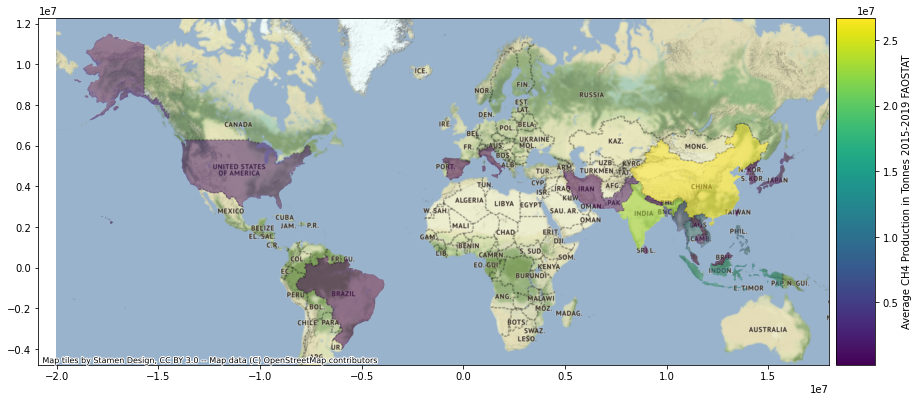

In [114]:
fig, ax = plt.subplots(1, 1,figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
faostat_map = faostat_geo_df.plot(column='Total', ax=ax, legend=True, cax=cax, alpha = .5,legend_kwds={'label': "Average CH4 Production in Tonnes 2015-2019 FAOSTAT",
                        'orientation': "vertical"})
cx.add_basemap(faostat_map, zoom=3)

## Trace Chlorpleth Map

In [115]:
gisfilepath = "/Users/jnapolitano/Projects/wattime-takehome/data/TRACE_DATA_GEO.geojson"


trace_geo_df = gpd.read_file(gisfilepath)

trace_geo_df = faostat_geo_df.to_crs(epsg=3857)

###  Trace Average Annual CH4 Production

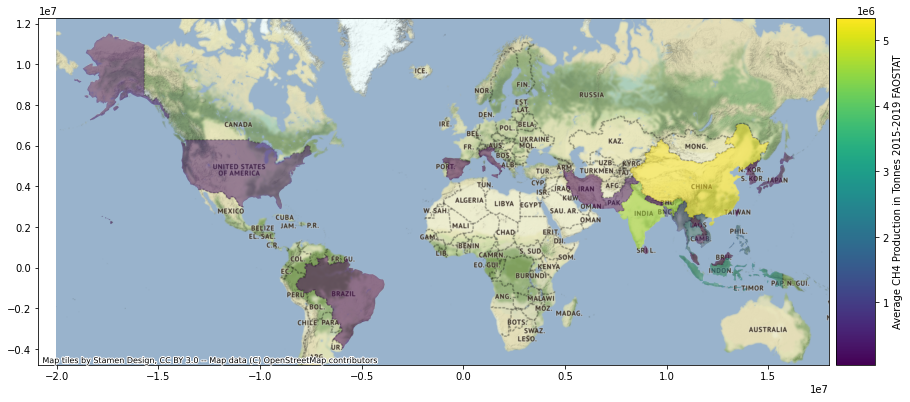

In [116]:
fig, ax = plt.subplots(1, 1,figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
trace_map = trace_geo_df.plot(column='Mean', ax=ax, legend=True, cax=cax, alpha = .5,legend_kwds={'label': "Average CH4 Production in Tonnes 2015-2019 FAOSTAT",
                        'orientation': "vertical"})
cx.add_basemap(trace_map, zoom=3)

### Total CH4 Production in Tons

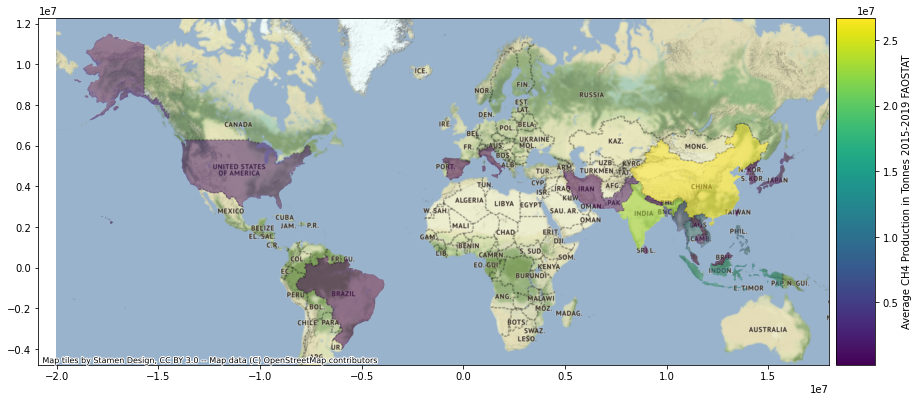

In [117]:
fig, ax = plt.subplots(1, 1,figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
trace_map = trace_geo_df.plot(column='Total', ax=ax, legend=True, cax=cax, alpha = .5,legend_kwds={'label': "Average CH4 Production in Tonnes 2015-2019 FAOSTAT",
                        'orientation': "vertical"})
cx.add_basemap(trace_map, zoom=3)

### IMpressions They are nearly identical.  Proved they are not significantly different.  Caclculate c02 equivalency for each.  And map.  

## Differneces Between the two: Merged Data Set

In [146]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/MERGE_DATA_GEO.geojson"

merge_geo_df = gpd.read_file(filepath)

merge_geo_df = merge_geo_df.to_crs(epsg=3857)


In [147]:
merge_geo_df

,pop_est,continent,name,iso3_country,gdp_md_est,country_name_x,2015,2016,2017,2018,...,abs_percent_diff_means,abs_percent_diff_totals,relative_percent_diff_2015,relative_percent_diff_2016,relative_percent_diff_2017,relative_percent_diff_2018,relative_percent_diff_2019,relative_percent_diff_means,relative_percent_diff_totals,geometry
0,1.578266e+08,Asia,Bangladesh,BGD,628400.0,Bangladesh,1131293.4,1.093480e+06,1.154531e+06,1.144591e+06,...,-61.744095,-90.424765,-107.233570,-110.576027,-105.179496,-106.058137,-106.044489,-89.318564,-165.045990,"POLYGON ((10316280.110 2516477.180, 10314002.0..."
1,2.073534e+08,South America,Brazil,BRA,3081000.0,Brazil,138910.3,1.262782e+05,1.303229e+05,1.216152e+05,...,-100.885244,-123.809763,-145.498958,-154.592668,-151.680933,-157.949510,-165.530230,-203.572604,-325.001645,"POLYGON ((-5941528.839 -3997743.062, -5972351...."
2,1.379303e+09,Asia,China,CHN,21140000.0,China,5406593.9,5.399920e+06,5.400129e+06,5.302173e+06,...,-11.163708,-44.086897,-13.447527,-13.570967,-13.567102,-15.378887,-17.001321,-11.823689,-56.553165,"MULTIPOLYGON (((12186724.586 2060702.116, 1209..."
3,4.895816e+07,Europe,Spain,ESP,1690000.0,Spain,55082.2,5.507310e+04,5.423240e+04,5.292500e+04,...,127.100756,104.875558,79.277072,79.260551,77.734286,75.360743,73.860258,77.713520,68.798928,"POLYGON ((-829744.933 4452745.895, -839026.744..."
4,2.605807e+08,Asia,Indonesia,IDN,3028000.0,Indonesia,2407953.5,2.387656e+06,2.425291e+06,2.405614e+06,...,71.107420,40.153426,46.691296,45.848377,47.411289,46.594130,40.447438,52.457008,33.439811,"MULTIPOLYGON (((15696071.624 -289546.893, 1569..."
5,1.281936e+09,Asia,India,IND,8721000.0,India,4580248.4,4.559136e+06,4.620791e+06,4.661155e+06,...,-35.149632,-66.534091,-35.798018,-36.258953,-34.912860,-34.031596,-34.899193,-42.644286,-99.702001,"POLYGON ((10834404.758 3281993.599, 10842803.5..."
6,8.202156e+07,Asia,Iran,IRN,1459000.0,Iran (Islamic Republic of),116486.7,1.310085e+05,8.723360e+04,9.393660e+04,...,12.838458,-20.716515,24.674600,37.141088,-0.438224,5.316081,7.176208,12.064040,-23.110344,"POLYGON ((5406561.826 3494141.340, 5344957.295..."
7,6.213780e+07,Europe,Italy,ITA,2221000.0,Italy,114574.8,1.180030e+05,1.180030e+05,1.094638e+05,...,79.146405,49.048053,56.395576,59.387683,59.387683,51.934735,53.183963,56.706018,39.388425,"MULTIPOLYGON (((1162476.208 5924715.388, 12299..."
8,1.264514e+08,Asia,Japan,JPN,4932000.0,Japan,330353.1,3.264030e+05,3.237003e+05,3.222450e+05,...,37.260284,4.052791,30.212099,29.016379,28.198254,27.757725,27.254264,31.408783,3.972296,"MULTIPOLYGON (((15794521.520 4747612.083, 1569..."
9,1.620449e+07,Asia,Cambodia,KHM,58940.0,Cambodia,436826.0,4.590031e+05,4.737453e+05,4.793627e+05,...,-17.850337,-50.433458,-13.424988,-8.348115,-4.973270,-3.687312,-6.201769,-19.599638,-67.439493,"POLYGON ((11419702.448 1366951.506, 11393338.3..."


## Total Percent Difference 2015 - 2019

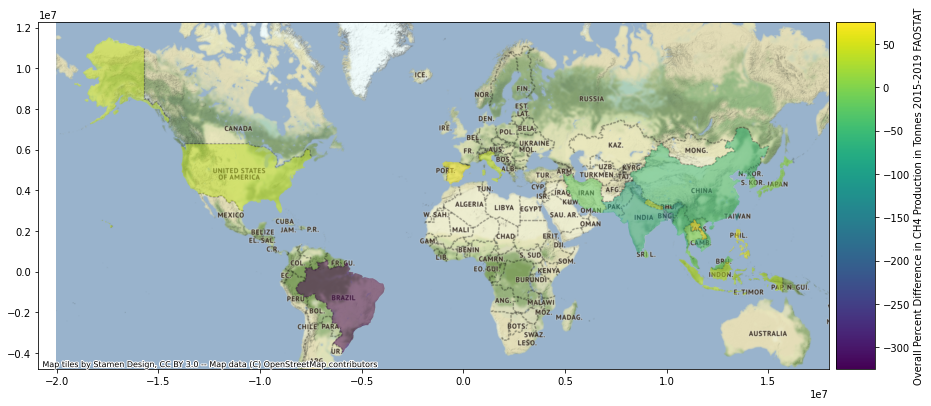

In [151]:
fig, ax = plt.subplots(1, 1,figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merge_map = merge_geo_df.plot(column='relative_percent_diff_totals', ax=ax, legend=True, cax=cax, alpha = .5,legend_kwds={'label': "Overall Percent Difference in CH4 Production in Tonnes 2015-2019 FAOSTAT",
                        'orientation': "vertical"})
cx.add_basemap(merge_map, zoom=3)